# All-SR-Training with Tag Balance
John Ignacio R.M. 2020-06-12

In [1]:
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada import get_trainvaltest_from_csv
from ada import BinaryClassifier1 as BC1
import pandas as pd
import numpy as np

Welcome to JupyROOT 6.20/04
Using TensorFlow backend.


In [2]:
data_path = "../processed_data"
signal = "Xtohh2000"
seed = 420

In [3]:
#get sets by tag separated
tag_0 = get_trainvaltest_from_csv(data_path, signal, .6, .2, .2, seed, region = "SR", tag = 0)
tag_1 = get_trainvaltest_from_csv(data_path, signal, .6, .2, .2, seed, region = "SR", tag = 1)
tag_2 = get_trainvaltest_from_csv(data_path, signal, .6, .2, .2, seed, region = "SR", tag = 2)

In [4]:
#join x
x_train = pd.concat([tag_0["x"]["train"], tag_1["x"]["train"], tag_2["x"]["train"]]).reset_index(drop=True)
x_val = pd.concat([tag_0["x"]["val"], tag_1["x"]["val"], tag_2["x"]["val"]]).reset_index(drop=True)
#x_test = pd.concat([tag_0["x"]["test"], tag_1["x"]["test"], tag_2["x"]["test"]]).reset_index(drop=True)

#join y
y_train = np.concatenate([tag_0["y"]["train"], tag_1["y"]["train"], tag_2["y"]["train"]])
y_val = np.concatenate([tag_0["y"]["val"], tag_1["y"]["val"], tag_2["y"]["val"]])
#y_test = np.concatenate([tag_0["y"]["test"], tag_1["y"]["test"], tag_2["y"]["test"]])

#join w
w_train = np.concatenate([tag_0["w"]["train"], tag_1["w"]["train"], tag_2["w"]["train"]])
w_val = np.concatenate([tag_0["w"]["val"], tag_1["w"]["val"], tag_2["w"]["val"]])
#w_test = np.concatenate([tag_0["w"]["test"], tag_1["w"]["test"], tag_2["w"]["test"]])

30/300
40688/40688 [==============================] - 5s 127us/step - loss: 8.4698e-04 - val_loss: 8.1791e-04
Epoch 131/300
40688/40688 [==============================] - 5s 128us/step - loss: 8.7475e-04 - val_loss: 8.2848e-04
Epoch 132/300
40688/40688 [==============================] - 5s 125us/step - loss: 8.5986e-04 - val_loss: 8.1264e-04
Epoch 133/300
40688/40688 [==============================] - 5s 129us/step - loss: 8.5254e-04 - val_loss: 8.1968e-04
Epoch 134/300
40688/40688 [==============================] - 5s 128us/step - loss: 8.4274e-04 - val_loss: 8.1280e-04
Epoch 135/300
40688/40688 [==============================] - 5s 127us/step - loss: 8.5863e-04 - val_loss: 8.2069e-04
Epoch 136/300
40688/40688 [==============================] - 5s 127us/step - loss: 8.5828e-04 - val_loss: 8.1947e-04
Epoch 137/300
40688/40688 [==============================] - 5s 127us/step - loss: 8.3386e-04 - val_loss: 8.1458e-04
Epoch 138/300
40688/40688 [==============================] - 5s 128us/s

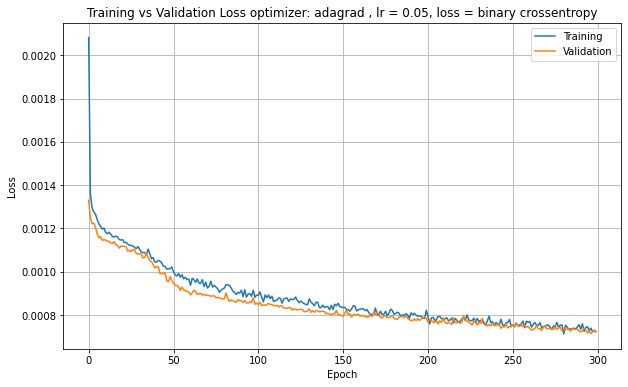

2020-06-14 13:40:04.684974: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-14 13:40:04.728861: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-14 13:40:04.729618: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 960M computeCapability: 5.0
coreClock: 1.176GHz coreCount: 5 deviceMemorySize: 1.96GiB deviceMemoryBandwidth: 74.65GiB/s
2020-06-14 13:40:04.729789: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-06-14 13:40:04.729958: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-06-14 13:40:05.012850: I tensorflow/stream_executor/platform/def

In [5]:
bc1 = BC1(x_train.shape[1])
bc1.fit(x_train, y_train, w_train, x_val, y_val, w_val, 300)
bc1.plot_loss()

In [6]:
#evaluate on tag 0
bc1.evaluate(tag_0["x"]["test"], tag_0["y"]["test"])

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      7801
           1       0.63      0.59      0.61       983

    accuracy                           0.91      8784
   macro avg       0.79      0.77      0.78      8784
weighted avg       0.91      0.91      0.91      8784

Confussion Matrix
[[7456  345]
 [ 407  576]]


In [7]:
#evaluate on tag 1
bc1.evaluate(tag_1["x"]["test"], tag_1["y"]["test"])

Classification Report
              precision    recall  f1-score   support

           0       0.44      0.94      0.60       640
           1       0.98      0.68      0.80      2393

    accuracy                           0.74      3033
   macro avg       0.71      0.81      0.70      3033
weighted avg       0.87      0.74      0.76      3033

Confussion Matrix
[[ 604   36]
 [ 763 1630]]


In [8]:
#evaluate on tag 2
bc1.evaluate(tag_2["x"]["test"], tag_2["y"]["test"])

Classification Report
              precision    recall  f1-score   support

           0       0.06      0.93      0.11        28
           1       1.00      0.75      0.86      1720

    accuracy                           0.75      1748
   macro avg       0.53      0.84      0.48      1748
weighted avg       0.98      0.75      0.84      1748

Confussion Matrix
[[  26    2]
 [ 429 1291]]
